In [1]:
# Parâmetros para degradação da hemicelulose
import pandas as pd

# Criar DataFrame com os parâmetros de degradação da hemicelulose para as três temperaturas
data = {
    'Temperature (°C)': [180, 195, 210],
    'k1 (1/min)': [0.0037, 0.0041, 0.0105],
    'k2 (1/min)': [0.0353, 0.0988, 0.2143],
    'k3 (1/min)': [0.0073, 0.0662, 0.2739],
    'k4 (1/min)': [0.0097, 0.0316, 0.0730],
    'k5 (1/min)': [0.0139, 0.0655, 0.1546],
    'k6 (1/min)': [0.0043, 0.0047, 0.0317]
}

df_kn_hemicellulose = pd.DataFrame(data)
df_kn_hemicellulose

,Temperature (°C),k1 (1/min),k2 (1/min),k3 (1/min),k4 (1/min),k5 (1/min),k6 (1/min)
0,180,0.0037,0.0353,0.0073,0.0097,0.0139,0.0043
1,195,0.0041,0.0988,0.0662,0.0316,0.0655,0.0047
2,210,0.0105,0.2143,0.2739,0.0730,0.1546,0.0317


In [2]:
# Parâmetros para degradação da celulose
data2 = {
    'Temperature (°C)': [180, 195, 210],
    'k1 (1/min)': [0.0051, 0.0060, 0.0294],
    'k2 (1/min)': [0.0002, 0.0084, 0.0080],
    'k3 (1/min)': [0.0550, 0.2400, 0.3100],
    'k4 (1/min)': [0.0023, 0.0070, 0.0460],
    'k5 (1/min)': [0.0531, 0.1573, 0.3772],
    'k6 (1/min)': [0.0007, 0.0010, 0.0588]
}

df_kn_cellulose = pd.DataFrame(data2)
df_kn_cellulose

,Temperature (°C),k1 (1/min),k2 (1/min),k3 (1/min),k4 (1/min),k5 (1/min),k6 (1/min)
0,180,0.0051,0.0002,0.055,0.0023,0.0531,0.0007
1,195,0.0060,0.0084,0.240,0.0070,0.1573,0.0010
2,210,0.0294,0.0080,0.310,0.0460,0.3772,0.0588


In [3]:
# Equações diferenciais para degradação da hemicelulose (usando os parâmetros do DataFrame)

# H: Hemicelulose, XOS: Xylo-oligossacarídeos, MH: Monossacarídeos hemicelulósicos, F: Furfural, D: Degradation Products

# As equações abaixo podem ser usadas em um solver numérico, por exemplo, scipy.integrate.odeint

def hemicellulose_kinetics(y, t, k):
    H, XOS, MH, F, D = y
    k1, k2, k3, k4, k5, k6 = k

    dH_dt = -(k1 + k2) * H
    dXOS_dt = k2 * H - k3 * XOS
    dMH_dt = k1 * H + k3 * XOS - (k4 + k5) * MH
    dF_dt = k4 * MH - k6 * F
    dD_dt = k5 * MH + k6 * F

    return [dH_dt, dXOS_dt, dMH_dt, dF_dt, dD_dt]

# Exemplo de uso:
# k = df_kn_hemicellulose.iloc[0, 1:].values  # Parâmetros para 180°C
# y0 = [H0, XOS0, MH0, F0, D0]  # Condições iniciais
# t = np.linspace(0, tempo_final, num_pontos)
# from scipy.integrate import odeint
# resultado = odeint(hemicellulose_kinetics, y0, t, args=(k,))

In [4]:
# Equações diferenciais para degradação da celulose (usando os parâmetros do DataFrame)

# C: Celulose, GOS: Glicooligossacarídeos, MC: Monossacarídeos celulósicos, HMF: Hidroximetilfurfural, D: Degradation Products

# As equações abaixo podem ser usadas em um solver numérico, por exemplo, scipy.integrate.odeint

def cellulose_kinetics(y, t, k):
    C, GOS, MC, HMF, D = y
    k1, k2, k3, k4, k5, k6 = k

    dC_dt = -(k1 + k2) * C
    dGOS_dt = k2 * C - k3 * GOS
    dMC_dt = k1 * C + k3 * GOS - (k4 + k5) * MC
    dHMF_dt = k4 * MC - k6 * HMF
    dD_dt = k5 * MC + k6 * HMF

    return [dC_dt, dGOS_dt, dMC_dt, dHMF_dt, dD_dt]

# Exemplo de uso:
# k = df_kn_cellulose.iloc[0, 1:].values  # Parâmetros para 180°C
# y0 = [C0, GOS0, MC0, HMF0, D0]  # Condições iniciais
# t = np.linspace(0, tempo_final, num_pontos)
# from scipy.integrate import odeint
# resultado = odeint(cellulose_kinetics, y0, t, args=(k,))

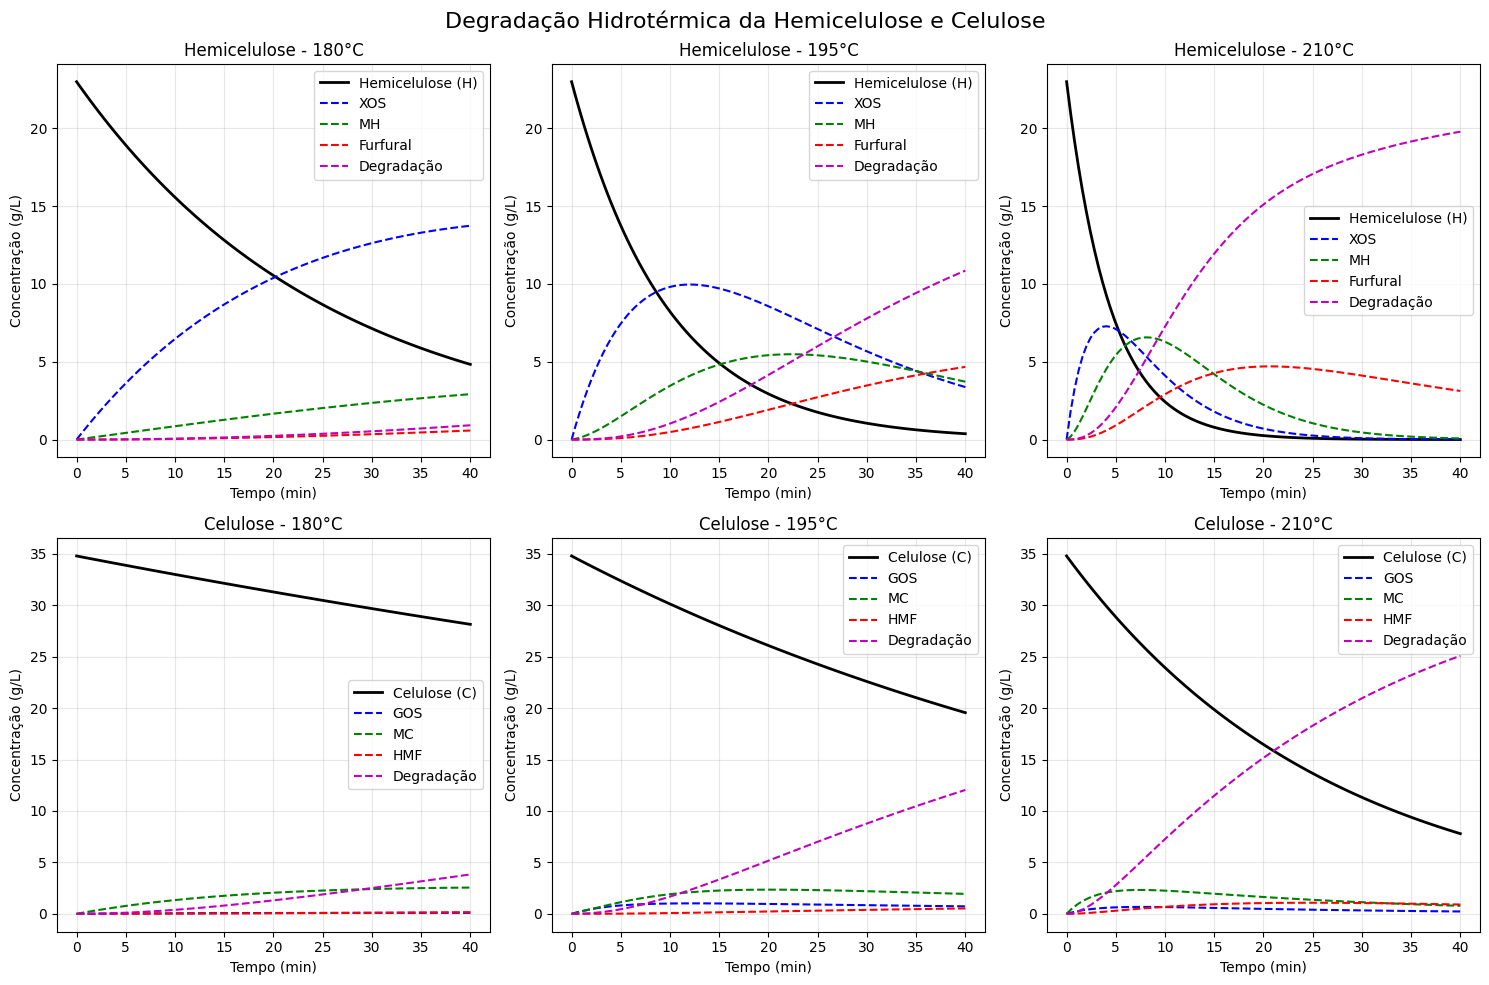

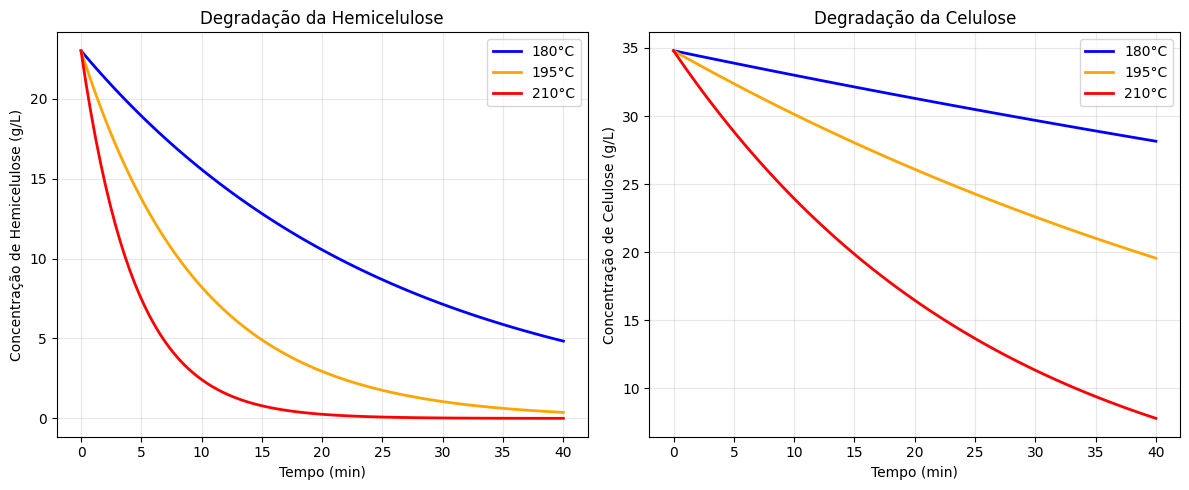

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Configurações de simulação
t_final = 40  # minutos
t = np.linspace(0, t_final, 100)

# Condições iniciais e concentrações da biomassa (g/L)
# Considerando 100 g/L de sólidos com as composições dadas
solid_loading = 100  # g/L
cellulose_fraction = 0.348
hemicellulose_fraction = 0.230

# Concentrações iniciais em g/L
C0 = solid_loading * cellulose_fraction  # ~34.8 g/L
H0 = solid_loading * hemicellulose_fraction  # ~23.0 g/L

# Condições iniciais para hemicelulose (g/L)
# H=23.0, XOS=0, MH=0, F=0, D=0
y0_hemi = [H0, 0.0, 0.0, 0.0, 0.0]

# Condições iniciais para celulose (g/L)
# C=34.8, GOS=0, MC=0, HMF=0, D=0
y0_cell = [C0, 0.0, 0.0, 0.0, 0.0]

# Criar subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Degradação Hidrotérmica da Hemicelulose e Celulose', fontsize=16)

# Simular para cada temperatura
temperaturas = [180, 195, 210]
cores = ['blue', 'orange', 'red']

for i, temp in enumerate(temperaturas):
    # Parâmetros para hemicelulose
    k_hemi = df_kn_hemicellulose.iloc[i, 1:].values
    sol_hemi = odeint(hemicellulose_kinetics, y0_hemi, t, args=(k_hemi,))
    
    # Parâmetros para celulose
    k_cell = df_kn_cellulose.iloc[i, 1:].values
    sol_cell = odeint(cellulose_kinetics, y0_cell, t, args=(k_cell,))
    
    # Plot degradação da hemicelulose
    axes[0, i].plot(t, sol_hemi[:, 0], 'k-', linewidth=2, label='Hemicelulose (H)')
    axes[0, i].plot(t, sol_hemi[:, 1], 'b--', label='XOS')
    axes[0, i].plot(t, sol_hemi[:, 2], 'g--', label='MH')
    axes[0, i].plot(t, sol_hemi[:, 3], 'r--', label='Furfural')
    axes[0, i].plot(t, sol_hemi[:, 4], 'm--', label='Degradação')
    axes[0, i].set_title(f'Hemicelulose - {temp}°C')
    axes[0, i].set_xlabel('Tempo (min)')
    axes[0, i].set_ylabel('Concentração (g/L)')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Plot degradação da celulose
    axes[1, i].plot(t, sol_cell[:, 0], 'k-', linewidth=2, label='Celulose (C)')
    axes[1, i].plot(t, sol_cell[:, 1], 'b--', label='GOS')
    axes[1, i].plot(t, sol_cell[:, 2], 'g--', label='MC')
    axes[1, i].plot(t, sol_cell[:, 3], 'r--', label='HMF')
    axes[1, i].plot(t, sol_cell[:, 4], 'm--', label='Degradação')
    axes[1, i].set_title(f'Celulose - {temp}°C')
    axes[1, i].set_xlabel('Tempo (min)')
    axes[1, i].set_ylabel('Concentração (g/L)')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparação da degradação do polímero original em diferentes temperaturas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, temp in enumerate(temperaturas):
    k_hemi = df_kn_hemicellulose.iloc[i, 1:].values
    sol_hemi = odeint(hemicellulose_kinetics, y0_hemi, t, args=(k_hemi,))
    plt.plot(t, sol_hemi[:, 0], color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Degradação da Hemicelulose')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de Hemicelulose (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, temp in enumerate(temperaturas):
    k_cell = df_kn_cellulose.iloc[i, 1:].values
    sol_cell = odeint(cellulose_kinetics, y0_cell, t, args=(k_cell,))
    plt.plot(t, sol_cell[:, 0], color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Degradação da Celulose')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de Celulose (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

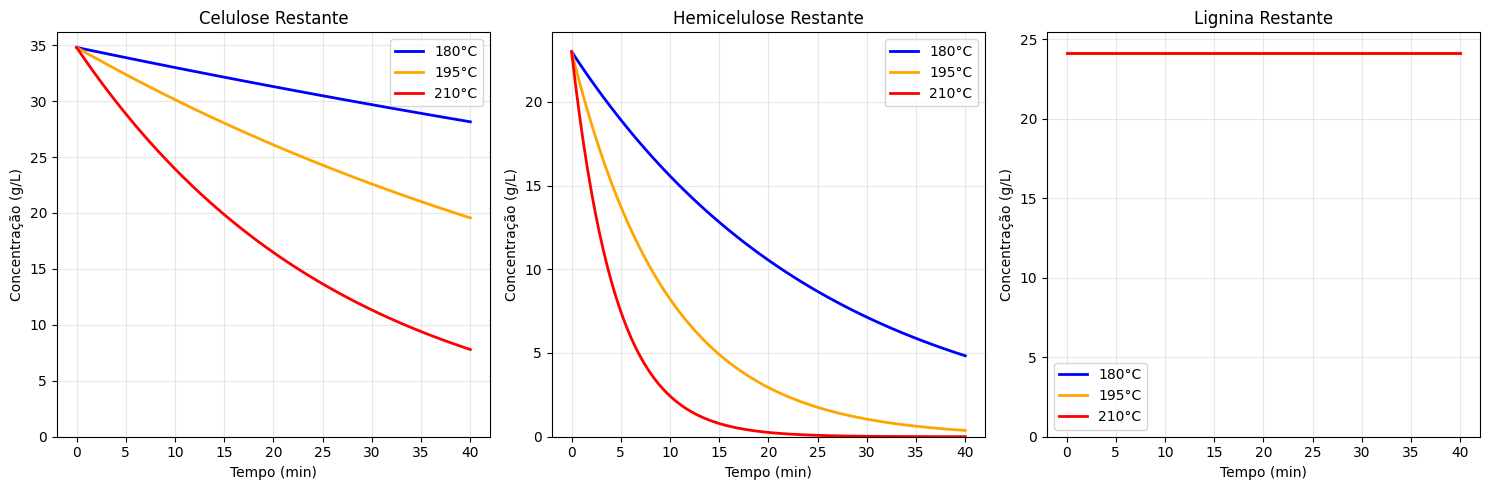

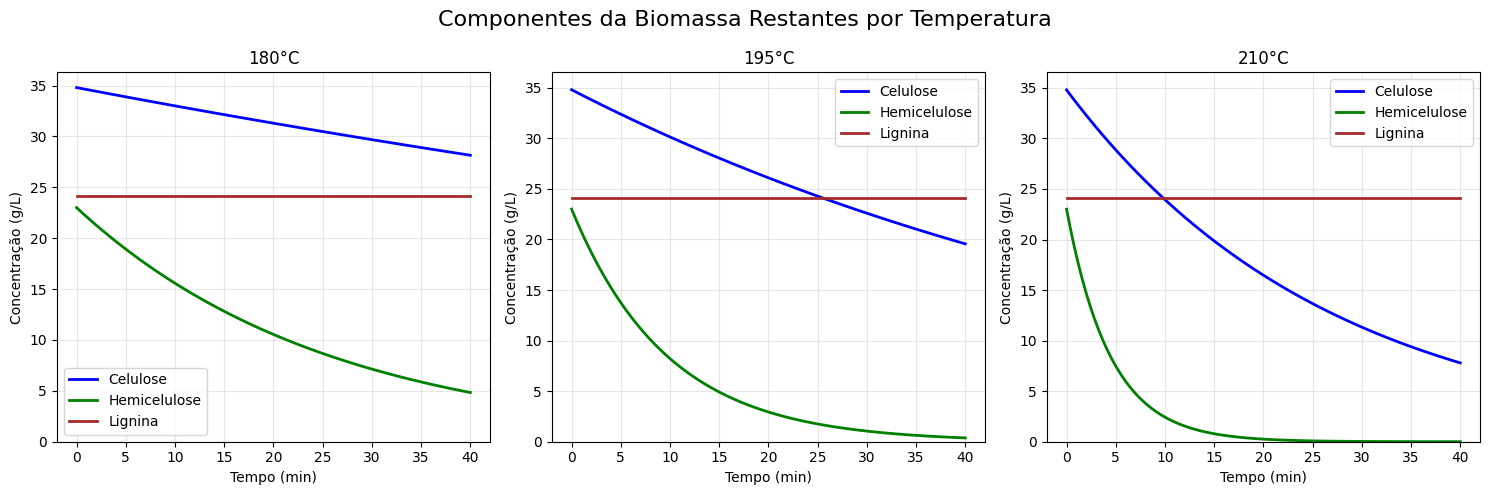

Porcentagem de degradação após 40 minutos:
180°C:
  Celulose degradada: 19.1%
  Hemicelulose degradada: 79.0%
  Lignina degradada: 0.0% (assumida estável)

195°C:
  Celulose degradada: 43.8%
  Hemicelulose degradada: 98.4%
  Lignina degradada: 0.0% (assumida estável)

210°C:
  Celulose degradada: 77.6%
  Hemicelulose degradada: 100.0%
  Lignina degradada: 0.0% (assumida estável)



In [6]:
# Plotar a quantidade restante de Celulose, Hemicelulose e Lignina

# Concentrações iniciais dos componentes da biomassa (g/L)
lignin_fraction = 0.241
lignin_initial = solid_loading * lignin_fraction  # ~24.1 g/L

# Função para calcular componentes restantes
def calculate_remaining_components(t, temperaturas):
    """
    Calcula a quantidade restante de celulose, hemicelulose e lignina
    para diferentes temperaturas ao longo do tempo
    """
    results = {}
    
    for i, temp in enumerate(temperaturas):
        # Parâmetros para hemicelulose e celulose
        k_hemi = df_kn_hemicellulose.iloc[i, 1:].values
        k_cell = df_kn_cellulose.iloc[i, 1:].values
        
        # Resolver EDOs
        sol_hemi = odeint(hemicellulose_kinetics, y0_hemi, t, args=(k_hemi,))
        sol_cell = odeint(cellulose_kinetics, y0_cell, t, args=(k_cell,))
        
        # Concentrações restantes
        cellulose_remaining = sol_cell[:, 0]  # Primeira coluna é a celulose
        hemicellulose_remaining = sol_hemi[:, 0]  # Primeira coluna é a hemicelulose
        
        # Assumindo que a lignina não se degrada significativamente
        # nas condições de pré-tratamento hidrotérmico
        lignin_remaining = np.full_like(t, lignin_initial)
        
        results[temp] = {
            'cellulose': cellulose_remaining,
            'hemicellulose': hemicellulose_remaining,
            'lignin': lignin_remaining
        }
    
    return results

# Calcular componentes restantes
remaining_components = calculate_remaining_components(t, temperaturas)

# Plotar resultados
plt.figure(figsize=(15, 5))

# Plot 1: Celulose restante
plt.subplot(1, 3, 1)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['cellulose'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Celulose Restante')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, None)

# Plot 2: Hemicelulose restante
plt.subplot(1, 3, 2)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['hemicellulose'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Hemicelulose Restante')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, None)

# Plot 3: Lignina restante
plt.subplot(1, 3, 3)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['lignin'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Lignina Restante')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, None)

plt.tight_layout()
plt.show()

# Plot comparativo - todos os componentes em um gráfico para cada temperatura
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Componentes da Biomassa Restantes por Temperatura', fontsize=16)

for i, temp in enumerate(temperaturas):
    axes[i].plot(t, remaining_components[temp]['cellulose'], 
                 'b-', linewidth=2, label='Celulose')
    axes[i].plot(t, remaining_components[temp]['hemicellulose'], 
                 'g-', linewidth=2, label='Hemicelulose')
    axes[i].plot(t, remaining_components[temp]['lignin'], 
                 'brown', linewidth=2, label='Lignina')
    
    axes[i].set_title(f'{temp}°C')
    axes[i].set_xlabel('Tempo (min)')
    axes[i].set_ylabel('Concentração (g/L)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(0, None)

plt.tight_layout()
plt.show()

# Mostrar porcentagens de degradação no final (40 min)
print("Porcentagem de degradação após 40 minutos:")
print("=" * 50)
for temp in temperaturas:
    cellulose_final = remaining_components[temp]['cellulose'][-1]
    hemicellulose_final = remaining_components[temp]['hemicellulose'][-1]
    
    cellulose_degraded = (1 - cellulose_final/C0) * 100
    hemicellulose_degraded = (1 - hemicellulose_final/H0) * 100
    
    print(f"{temp}°C:")
    print(f"  Celulose degradada: {cellulose_degraded:.1f}%")
    print(f"  Hemicelulose degradada: {hemicellulose_degraded:.1f}%")
    print(f"  Lignina degradada: 0.0% (assumida estável)")
    print()

Parâmetros Cinéticos:
Hemicelulose:
   Temperature (°C)  k1 (1/min)  k2 (1/min)  k3 (1/min)  k4 (1/min)  \
0               180      0.0037      0.0353      0.0073      0.0097   
1               195      0.0041      0.0988      0.0662      0.0316   
2               210      0.0105      0.2143      0.2739      0.0730   

   k5 (1/min)  k6 (1/min)  
0      0.0139      0.0043  
1      0.0655      0.0047  
2      0.1546      0.0317  

Celulose:
   Temperature (°C)  k1 (1/min)  k2 (1/min)  k3 (1/min)  k4 (1/min)  \
0               180      0.0051      0.0002       0.055      0.0023   
1               195      0.0060      0.0084       0.240      0.0070   
2               210      0.0294      0.0080       0.310      0.0460   

   k5 (1/min)  k6 (1/min)  
0      0.0531      0.0007  
1      0.1573      0.0010  
2      0.3772      0.0588  

Concentrações Iniciais:
Celulose: 34.8 g/L
Hemicelulose: 23.0 g/L
Lignina: 24.1 g/L


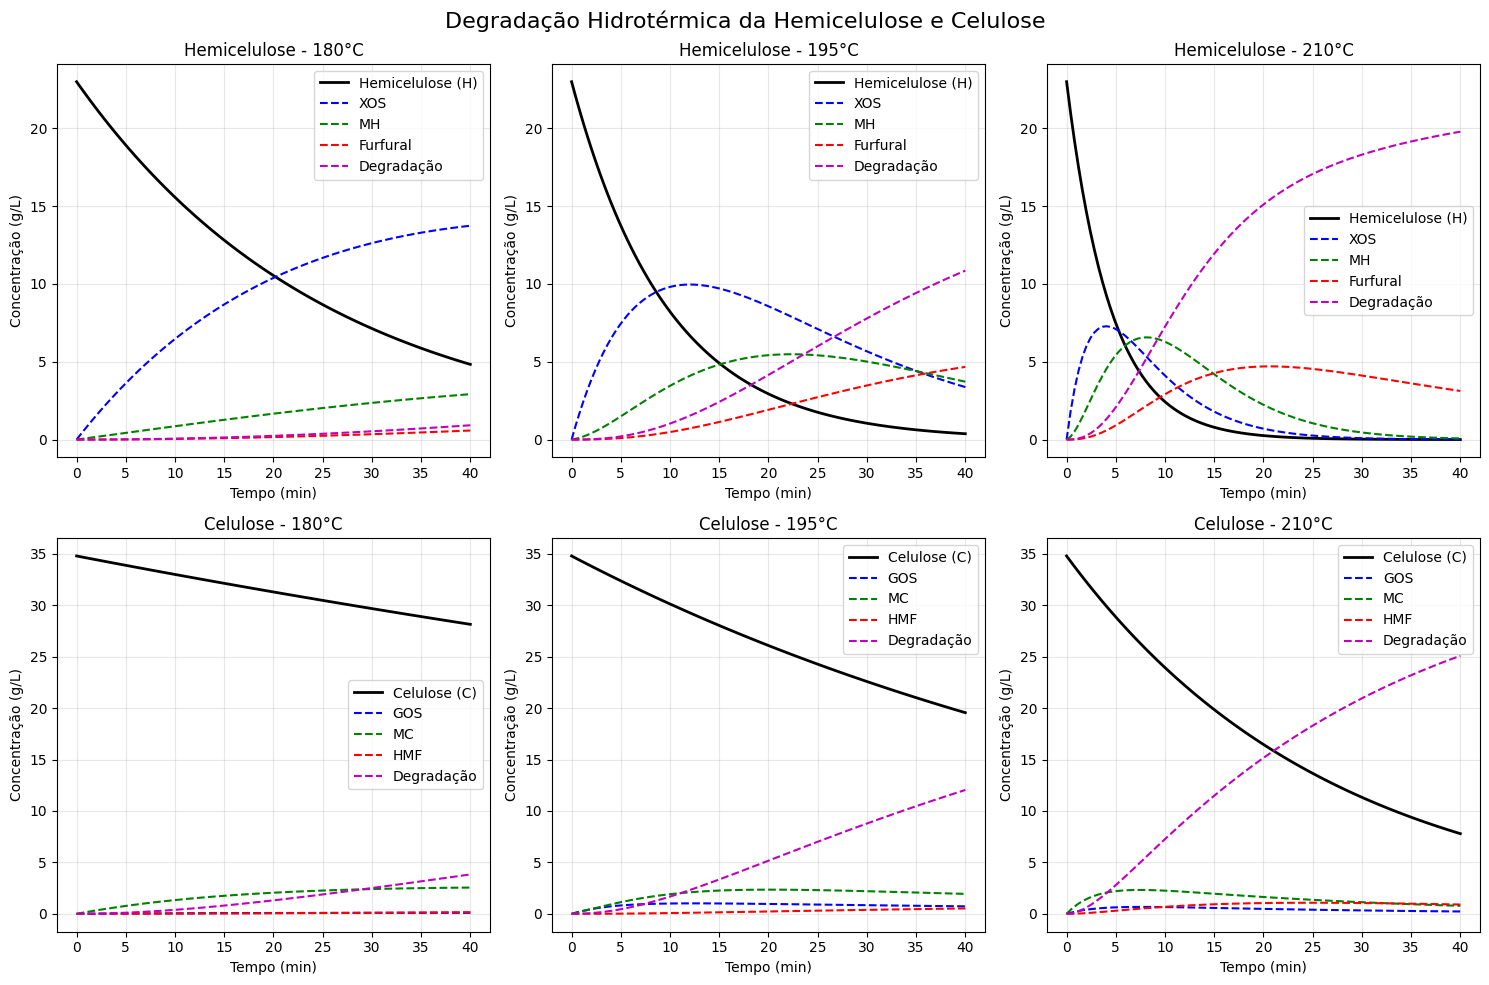

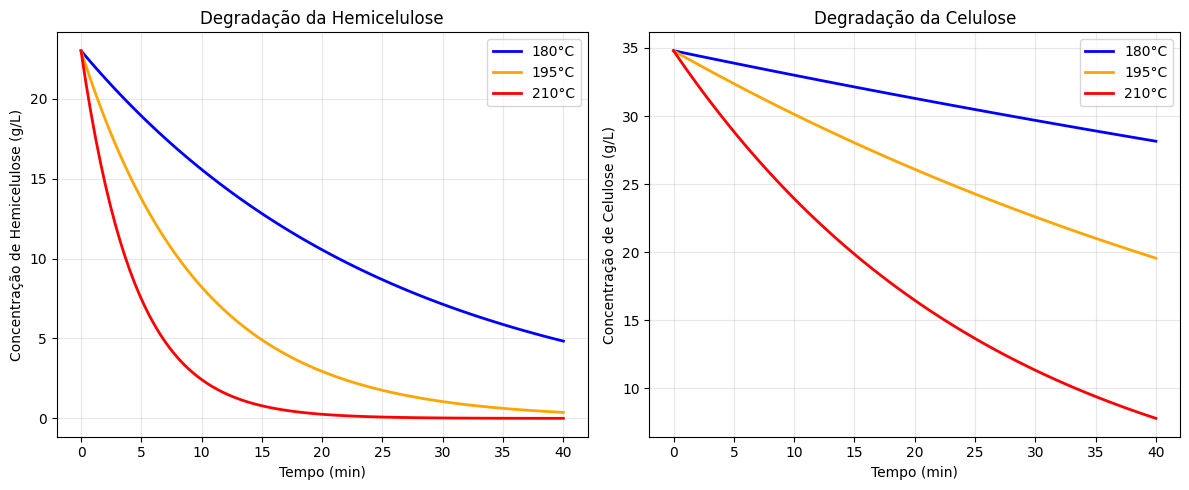

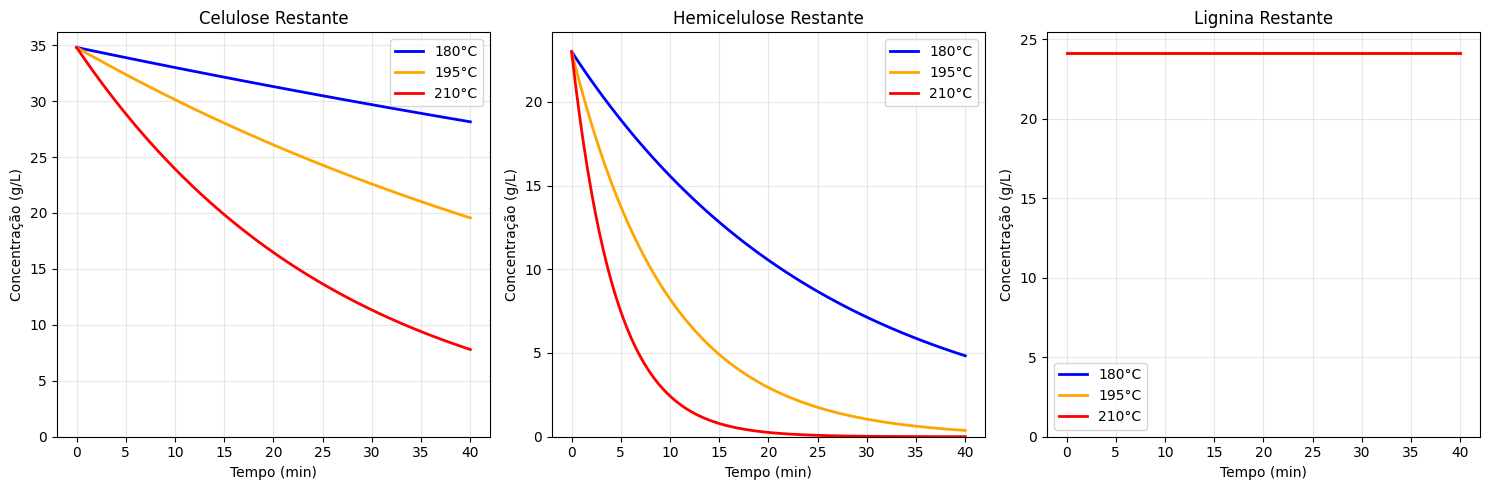

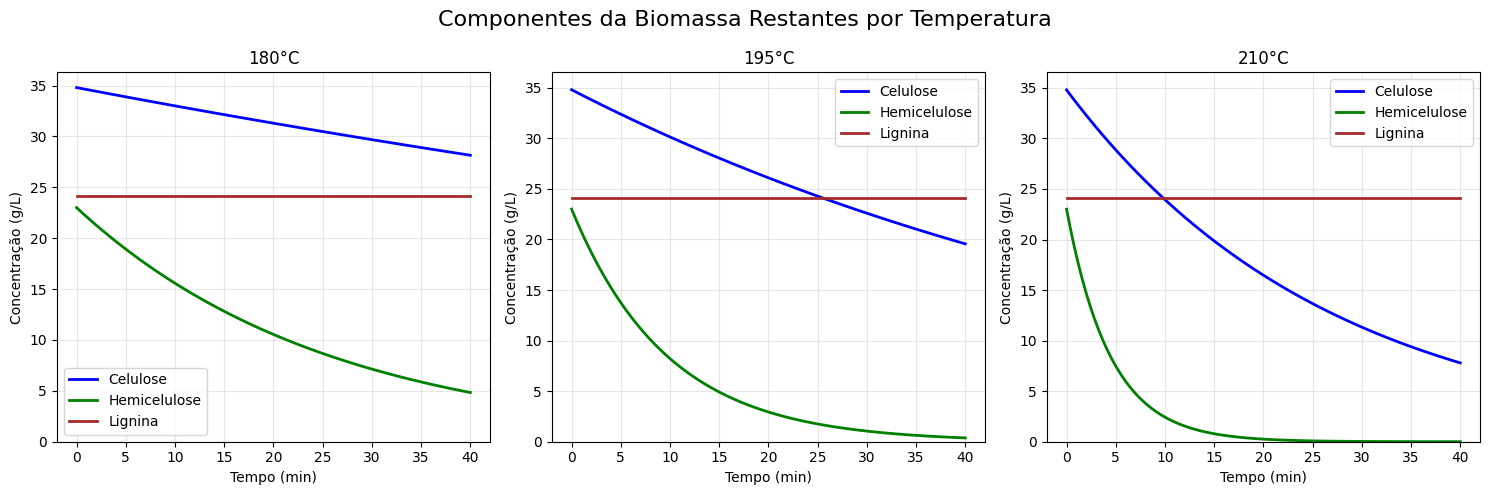


ANÁLISE QUANTITATIVA - DEGRADAÇÃO APÓS 40 MINUTOS

180°C:
  Celulose restante: 28.2 g/L (80.9%)
  Celulose degradada: 19.1%
  Hemicelulose restante: 4.8 g/L (21.0%)
  Hemicelulose degradada: 79.0%
  Lignina: 24.1 g/L (100.0% - assumida estável)

195°C:
  Celulose restante: 19.6 g/L (56.2%)
  Celulose degradada: 43.8%
  Hemicelulose restante: 0.4 g/L (1.6%)
  Hemicelulose degradada: 98.4%
  Lignina: 24.1 g/L (100.0% - assumida estável)

210°C:
  Celulose restante: 7.8 g/L (22.4%)
  Celulose degradada: 77.6%
  Hemicelulose restante: 0.0 g/L (0.0%)
  Hemicelulose degradada: 100.0%
  Lignina: 24.1 g/L (100.0% - assumida estável)

SIMULAÇÃO COMPLETA FINALIZADA


In [7]:
# PREATREATMENT HIDROTÉRMICO - SIMULAÇÃO COMPLETA
# Análise cinética da degradação da hemicelulose e celulose

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# =============================================================================
# 1. PARÂMETROS CINÉTICOS
# =============================================================================

# Parâmetros para degradação da hemicelulose
data_hemi = {
    'Temperature (°C)': [180, 195, 210],
    'k1 (1/min)': [0.0037, 0.0041, 0.0105],
    'k2 (1/min)': [0.0353, 0.0988, 0.2143],
    'k3 (1/min)': [0.0073, 0.0662, 0.2739],
    'k4 (1/min)': [0.0097, 0.0316, 0.0730],
    'k5 (1/min)': [0.0139, 0.0655, 0.1546],
    'k6 (1/min)': [0.0043, 0.0047, 0.0317]
}

# Parâmetros para degradação da celulose
data_cell = {
    'Temperature (°C)': [180, 195, 210],
    'k1 (1/min)': [0.0051, 0.0060, 0.0294],
    'k2 (1/min)': [0.0002, 0.0084, 0.0080],
    'k3 (1/min)': [0.0550, 0.2400, 0.3100],
    'k4 (1/min)': [0.0023, 0.0070, 0.0460],
    'k5 (1/min)': [0.0531, 0.1573, 0.3772],
    'k6 (1/min)': [0.0007, 0.0010, 0.0588]
}

df_kn_hemicellulose = pd.DataFrame(data_hemi)
df_kn_cellulose = pd.DataFrame(data_cell)

print("Parâmetros Cinéticos:")
print("Hemicelulose:")
print(df_kn_hemicellulose)
print("\nCelulose:")
print(df_kn_cellulose)

# =============================================================================
# 2. EQUAÇÕES DIFERENCIAIS
# =============================================================================

def hemicellulose_kinetics(y, t, k):
    """
    Equações diferenciais para degradação da hemicelulose
    H: Hemicelulose, XOS: Xylo-oligossacarídeos, MH: Monossacarídeos hemicelulósicos, 
    F: Furfural, D: Produtos de degradação
    """
    H, XOS, MH, F, D = y
    k1, k2, k3, k4, k5, k6 = k

    dH_dt = -(k1 + k2) * H
    dXOS_dt = k2 * H - k3 * XOS
    dMH_dt = k1 * H + k3 * XOS - (k4 + k5) * MH
    dF_dt = k4 * MH - k6 * F
    dD_dt = k5 * MH + k6 * F

    return [dH_dt, dXOS_dt, dMH_dt, dF_dt, dD_dt]

def cellulose_kinetics(y, t, k):
    """
    Equações diferenciais para degradação da celulose
    C: Celulose, GOS: Glicooligossacarídeos, MC: Monossacarídeos celulósicos, 
    HMF: Hidroximetilfurfural, D: Produtos de degradação
    """
    C, GOS, MC, HMF, D = y
    k1, k2, k3, k4, k5, k6 = k

    dC_dt = -(k1 + k2) * C
    dGOS_dt = k2 * C - k3 * GOS
    dMC_dt = k1 * C + k3 * GOS - (k4 + k5) * MC
    dHMF_dt = k4 * MC - k6 * HMF
    dD_dt = k5 * MC + k6 * HMF

    return [dC_dt, dGOS_dt, dMC_dt, dHMF_dt, dD_dt]

# =============================================================================
# 3. CONFIGURAÇÕES DE SIMULAÇÃO
# =============================================================================

# Parâmetros de simulação
t_final = 40  # minutos
t = np.linspace(0, t_final, 100)
temperaturas = [180, 195, 210]
cores = ['blue', 'orange', 'red']

# Concentrações iniciais da biomassa (g/L)
solid_loading = 100  # g/L
cellulose_fraction = 0.348
hemicellulose_fraction = 0.230
lignin_fraction = 0.241

# Concentrações iniciais em g/L
C0 = solid_loading * cellulose_fraction  # ~34.8 g/L
H0 = solid_loading * hemicellulose_fraction  # ~23.0 g/L
lignin_initial = solid_loading * lignin_fraction  # ~24.1 g/L

# Condições iniciais
y0_hemi = [H0, 0.0, 0.0, 0.0, 0.0]  # H, XOS, MH, F, D
y0_cell = [C0, 0.0, 0.0, 0.0, 0.0]  # C, GOS, MC, HMF, D

print(f"\nConcentrações Iniciais:")
print(f"Celulose: {C0:.1f} g/L")
print(f"Hemicelulose: {H0:.1f} g/L")
print(f"Lignina: {lignin_initial:.1f} g/L")

# =============================================================================
# 4. SIMULAÇÕES E FUNÇÃO AUXILIAR
# =============================================================================

def calculate_remaining_components(t, temperaturas):
    """Calcula componentes restantes para diferentes temperaturas"""
    results = {}
    
    for i, temp in enumerate(temperaturas):
        k_hemi = df_kn_hemicellulose.iloc[i, 1:].values
        k_cell = df_kn_cellulose.iloc[i, 1:].values
        
        sol_hemi = odeint(hemicellulose_kinetics, y0_hemi, t, args=(k_hemi,))
        sol_cell = odeint(cellulose_kinetics, y0_cell, t, args=(k_cell,))
        
        results[temp] = {
            'cellulose': sol_cell[:, 0],
            'hemicellulose': sol_hemi[:, 0],
            'lignin': np.full_like(t, lignin_initial),
            'sol_hemi': sol_hemi,
            'sol_cell': sol_cell
        }
    
    return results

# Calcular todas as simulações
remaining_components = calculate_remaining_components(t, temperaturas)

# =============================================================================
# 5. VISUALIZAÇÕES
# =============================================================================

# Gráfico 1: Degradação detalhada de todos os componentes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Degradação Hidrotérmica da Hemicelulose e Celulose', fontsize=16)

for i, temp in enumerate(temperaturas):
    sol_hemi = remaining_components[temp]['sol_hemi']
    sol_cell = remaining_components[temp]['sol_cell']
    
    # Plot degradação da hemicelulose
    axes[0, i].plot(t, sol_hemi[:, 0], 'k-', linewidth=2, label='Hemicelulose (H)')
    axes[0, i].plot(t, sol_hemi[:, 1], 'b--', label='XOS')
    axes[0, i].plot(t, sol_hemi[:, 2], 'g--', label='MH')
    axes[0, i].plot(t, sol_hemi[:, 3], 'r--', label='Furfural')
    axes[0, i].plot(t, sol_hemi[:, 4], 'm--', label='Degradação')
    axes[0, i].set_title(f'Hemicelulose - {temp}°C')
    axes[0, i].set_xlabel('Tempo (min)')
    axes[0, i].set_ylabel('Concentração (g/L)')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Plot degradação da celulose
    axes[1, i].plot(t, sol_cell[:, 0], 'k-', linewidth=2, label='Celulose (C)')
    axes[1, i].plot(t, sol_cell[:, 1], 'b--', label='GOS')
    axes[1, i].plot(t, sol_cell[:, 2], 'g--', label='MC')
    axes[1, i].plot(t, sol_cell[:, 3], 'r--', label='HMF')
    axes[1, i].plot(t, sol_cell[:, 4], 'm--', label='Degradação')
    axes[1, i].set_title(f'Celulose - {temp}°C')
    axes[1, i].set_xlabel('Tempo (min)')
    axes[1, i].set_ylabel('Concentração (g/L)')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico 2: Comparação da degradação dos polímeros originais
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['hemicellulose'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Degradação da Hemicelulose')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de Hemicelulose (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['cellulose'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')

plt.title('Degradação da Celulose')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de Celulose (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico 3: Componentes restantes separadamente
plt.figure(figsize=(15, 5))

# Celulose restante
plt.subplot(1, 3, 1)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['cellulose'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')
plt.title('Celulose Restante')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, None)

# Hemicelulose restante
plt.subplot(1, 3, 2)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['hemicellulose'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')
plt.title('Hemicelulose Restante')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, None)

# Lignina restante
plt.subplot(1, 3, 3)
for i, temp in enumerate(temperaturas):
    plt.plot(t, remaining_components[temp]['lignin'], 
             color=cores[i], linewidth=2, label=f'{temp}°C')
plt.title('Lignina Restante')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, None)

plt.tight_layout()
plt.show()

# Gráfico 4: Componentes por temperatura
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Componentes da Biomassa Restantes por Temperatura', fontsize=16)

for i, temp in enumerate(temperaturas):
    axes[i].plot(t, remaining_components[temp]['cellulose'], 
                 'b-', linewidth=2, label='Celulose')
    axes[i].plot(t, remaining_components[temp]['hemicellulose'], 
                 'g-', linewidth=2, label='Hemicelulose')
    axes[i].plot(t, remaining_components[temp]['lignin'], 
                 'brown', linewidth=2, label='Lignina')
    
    axes[i].set_title(f'{temp}°C')
    axes[i].set_xlabel('Tempo (min)')
    axes[i].set_ylabel('Concentração (g/L)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(0, None)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. ANÁLISE QUANTITATIVA
# =============================================================================

print("\n" + "="*60)
print("ANÁLISE QUANTITATIVA - DEGRADAÇÃO APÓS 40 MINUTOS")
print("="*60)

for temp in temperaturas:
    cellulose_final = remaining_components[temp]['cellulose'][-1]
    hemicellulose_final = remaining_components[temp]['hemicellulose'][-1]
    
    cellulose_degraded = (1 - cellulose_final/C0) * 100
    hemicellulose_degraded = (1 - hemicellulose_final/H0) * 100
    
    print(f"\n{temp}°C:")
    print(f"  Celulose restante: {cellulose_final:.1f} g/L ({100-cellulose_degraded:.1f}%)")
    print(f"  Celulose degradada: {cellulose_degraded:.1f}%")
    print(f"  Hemicelulose restante: {hemicellulose_final:.1f} g/L ({100-hemicellulose_degraded:.1f}%)")
    print(f"  Hemicelulose degradada: {hemicellulose_degraded:.1f}%")
    print(f"  Lignina: {lignin_initial:.1f} g/L (100.0% - assumida estável)")

print(f"\n{'='*60}")
print("SIMULAÇÃO COMPLETA FINALIZADA")
print("="*60)

In [8]:
# Quanto de celulose e hemicelulose foi degradada em 15 min a 195°C

# Índice mais próximo de 15 minutos
idx_15 = np.argmin(np.abs(t - 15))

# Concentração restante em 15 min a 195°C
cellulose_15 = remaining_components[195]['cellulose'][idx_15]
hemicellulose_15 = remaining_components[195]['hemicellulose'][idx_15]

# Porcentagem degradada
cellulose_degraded_15 = (1 - cellulose_15/C0) * 100
hemicellulose_degraded_15 = (1 - hemicellulose_15/H0) * 100

print("Degradação em 15 min a 195°C:")
print(f"  Celulose degradada: {cellulose_degraded_15:.1f}% ({C0-cellulose_15:.2f} g/L)")
print(f"  Hemicelulose degradada: {hemicellulose_degraded_15:.1f}% ({H0-hemicellulose_15:.2f} g/L)")

Degradação em 15 min a 195°C:
  Celulose degradada: 19.4% (6.74 g/L)
  Hemicelulose degradada: 78.5% (18.06 g/L)


Condições de Simulação:
Temperatura: 195°C
Carga de sólidos: 100 g/L
Tempo de simulação: 40 min
Composição da biomassa:
  - Celulose: 34.8%
  - Hemicelulose: 23.0%
  - Lignina: 24.1%

Concentrações iniciais:
Celulose: 34.8 g/L
Hemicelulose: 23.0 g/L


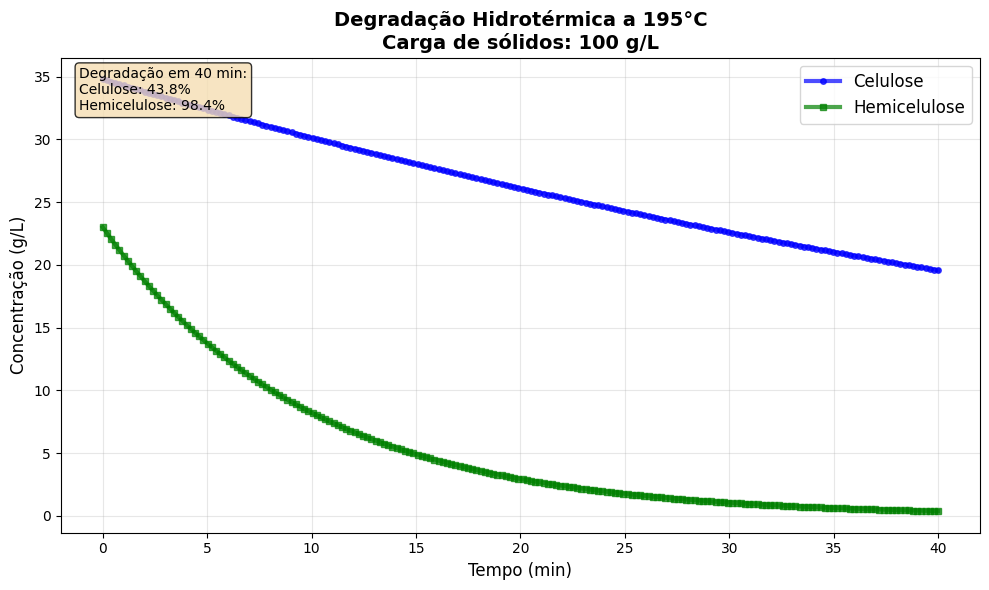


RESULTADOS DA SIMULAÇÃO
Condições: 195°C, 100 g/L, 40 min

Componente		Inicial		Final		Degradado
Celulose		34.8 g/L		19.6 g/L		43.8%
Hemicelulose		23.0 g/L		0.4 g/L		98.4%


In [9]:
# MODELO SIMPLIFICADO - DEGRADAÇÃO DE CELULOSE E HEMICELULOSE
# Gráfico único mostrando a variação temporal dos polímeros principais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# =============================================================================
# PARÂMETROS CONFIGURÁVEIS PELO USUÁRIO
# =============================================================================

# Configurações de processo
TEMPERATURA = 195  # °C (opções: 180, 195, 210)
SOLID_LOADING = 100  # g/L
TEMPO_FINAL = 40  # minutos

# Composição da biomassa (frações mássicas)
CELLULOSE_FRACTION = 0.348
HEMICELLULOSE_FRACTION = 0.230
LIGNIN_FRACTION = 0.241

print(f"Condições de Simulação:")
print(f"Temperatura: {TEMPERATURA}°C")
print(f"Carga de sólidos: {SOLID_LOADING} g/L")
print(f"Tempo de simulação: {TEMPO_FINAL} min")
print(f"Composição da biomassa:")
print(f"  - Celulose: {CELLULOSE_FRACTION*100:.1f}%")
print(f"  - Hemicelulose: {HEMICELLULOSE_FRACTION*100:.1f}%")
print(f"  - Lignina: {LIGNIN_FRACTION*100:.1f}%")

# =============================================================================
# PARÂMETROS CINÉTICOS E EQUAÇÕES
# =============================================================================

# Parâmetros para degradação da hemicelulose
data_hemi = {
    'Temperature (°C)': [180, 195, 210],
    'k1 (1/min)': [0.0037, 0.0041, 0.0105],
    'k2 (1/min)': [0.0353, 0.0988, 0.2143],
    'k3 (1/min)': [0.0073, 0.0662, 0.2739],
    'k4 (1/min)': [0.0097, 0.0316, 0.0730],
    'k5 (1/min)': [0.0139, 0.0655, 0.1546],
    'k6 (1/min)': [0.0043, 0.0047, 0.0317]
}

# Parâmetros para degradação da celulose
data_cell = {
    'Temperature (°C)': [180, 195, 210],
    'k1 (1/min)': [0.0051, 0.0060, 0.0294],
    'k2 (1/min)': [0.0002, 0.0084, 0.0080],
    'k3 (1/min)': [0.0550, 0.2400, 0.3100],
    'k4 (1/min)': [0.0023, 0.0070, 0.0460],
    'k5 (1/min)': [0.0531, 0.1573, 0.3772],
    'k6 (1/min)': [0.0007, 0.0010, 0.0588]
}

df_kn_hemicellulose = pd.DataFrame(data_hemi)
df_kn_cellulose = pd.DataFrame(data_cell)

def hemicellulose_kinetics(y, t, k):
    """Equações diferenciais para degradação da hemicelulose"""
    H, XOS, MH, F, D = y
    k1, k2, k3, k4, k5, k6 = k

    dH_dt = -(k1 + k2) * H
    dXOS_dt = k2 * H - k3 * XOS
    dMH_dt = k1 * H + k3 * XOS - (k4 + k5) * MH
    dF_dt = k4 * MH - k6 * F
    dD_dt = k5 * MH + k6 * F

    return [dH_dt, dXOS_dt, dMH_dt, dF_dt, dD_dt]

def cellulose_kinetics(y, t, k):
    """Equações diferenciais para degradação da celulose"""
    C, GOS, MC, HMF, D = y
    k1, k2, k3, k4, k5, k6 = k

    dC_dt = -(k1 + k2) * C
    dGOS_dt = k2 * C - k3 * GOS
    dMC_dt = k1 * C + k3 * GOS - (k4 + k5) * MC
    dHMF_dt = k4 * MC - k6 * HMF
    dD_dt = k5 * MC + k6 * HMF

    return [dC_dt, dGOS_dt, dMC_dt, dHMF_dt, dD_dt]

# =============================================================================
# CONFIGURAÇÃO DA SIMULAÇÃO
# =============================================================================

# Concentrações iniciais
C0 = SOLID_LOADING * CELLULOSE_FRACTION
H0 = SOLID_LOADING * HEMICELLULOSE_FRACTION

# Condições iniciais para as EDOs
y0_hemi = [H0, 0.0, 0.0, 0.0, 0.0]  # H, XOS, MH, F, D
y0_cell = [C0, 0.0, 0.0, 0.0, 0.0]  # C, GOS, MC, HMF, D

# Vetor de tempo
t = np.linspace(0, TEMPO_FINAL, 200)

# Obter parâmetros cinéticos para a temperatura escolhida
temp_idx = df_kn_hemicellulose[df_kn_hemicellulose['Temperature (°C)'] == TEMPERATURA].index[0]
k_hemi = df_kn_hemicellulose.iloc[temp_idx, 1:].values
k_cell = df_kn_cellulose.iloc[temp_idx, 1:].values

print(f"\nConcentrações iniciais:")
print(f"Celulose: {C0:.1f} g/L")
print(f"Hemicelulose: {H0:.1f} g/L")

# =============================================================================
# SIMULAÇÃO E RESULTADOS
# =============================================================================

# Resolver as EDOs
sol_hemi = odeint(hemicellulose_kinetics, y0_hemi, t, args=(k_hemi,))
sol_cell = odeint(cellulose_kinetics, y0_cell, t, args=(k_cell,))

# Concentrações de celulose e hemicelulose ao longo do tempo
cellulose_conc = sol_cell[:, 0]
hemicellulose_conc = sol_hemi[:, 0]

# =============================================================================
# VISUALIZAÇÃO
# =============================================================================

plt.figure(figsize=(10, 6))

# Plotar celulose e hemicelulose
plt.plot(t, cellulose_conc, 'b-', linewidth=3, label='Celulose', marker='o', markersize=4, alpha=0.7)
plt.plot(t, hemicellulose_conc, 'g-', linewidth=3, label='Hemicelulose', marker='s', markersize=4, alpha=0.7)

# Configurações do gráfico
plt.title(f'Degradação Hidrotérmica a {TEMPERATURA}°C\nCarga de sólidos: {SOLID_LOADING} g/L', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tempo (min)', fontsize=12)
plt.ylabel('Concentração (g/L)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Adicionar anotações com valores finais
cellulose_final = cellulose_conc[-1]
hemicellulose_final = hemicellulose_conc[-1]
cellulose_degraded = (1 - cellulose_final/C0) * 100
hemicellulose_degraded = (1 - hemicellulose_final/H0) * 100

plt.text(0.02, 0.98, f'Degradação em {TEMPO_FINAL} min:\n'
                     f'Celulose: {cellulose_degraded:.1f}%\n'
                     f'Hemicelulose: {hemicellulose_degraded:.1f}%', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# =============================================================================
# RELATÓRIO FINAL
# =============================================================================

print(f"\n{'='*50}")
print("RESULTADOS DA SIMULAÇÃO")
print("="*50)
print(f"Condições: {TEMPERATURA}°C, {SOLID_LOADING} g/L, {TEMPO_FINAL} min")
print(f"\nComponente\t\tInicial\t\tFinal\t\tDegradado")
print(f"{'='*50}")
print(f"Celulose\t\t{C0:.1f} g/L\t\t{cellulose_final:.1f} g/L\t\t{cellulose_degraded:.1f}%")
print(f"Hemicelulose\t\t{H0:.1f} g/L\t\t{hemicellulose_final:.1f} g/L\t\t{hemicellulose_degraded:.1f}%")
print("="*50)

In [10]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def simulate_hydrothermal_degradation(temperature, solid_loading, cellulose_fraction, hemicellulose_fraction, time_final):
    """
    Simula a degradação hidrotérmica de celulose e hemicelulose.
    
    Args:
        temperature (int): Temperatura em °C (180, 195, 210).
        solid_loading (float): Carga de sólidos em g/L.
        cellulose_fraction (float): Fração mássica de celulose.
        hemicellulose_fraction (float): Fração mássica de hemicelulose.
        time_final (int): Tempo final da simulação em minutos.
    
    Returns:
        dict: Resultados da simulação contendo os tempos e concentrações.
    """
    # Parâmetros cinéticos
    data_hemi = {
        'Temperature (°C)': [180, 195, 210],
        'k1 (1/min)': [0.0037, 0.0041, 0.0105],
        'k2 (1/min)': [0.0353, 0.0988, 0.2143],
        'k3 (1/min)': [0.0073, 0.0662, 0.2739],
        'k4 (1/min)': [0.0097, 0.0316, 0.0730],
        'k5 (1/min)': [0.0139, 0.0655, 0.1546],
        'k6 (1/min)': [0.0043, 0.0047, 0.0317]
    }

    data_cell = {
        'Temperature (°C)': [180, 195, 210],
        'k1 (1/min)': [0.0051, 0.0060, 0.0294],
        'k2 (1/min)': [0.0002, 0.0084, 0.0080],
        'k3 (1/min)': [0.0550, 0.2400, 0.3100],
        'k4 (1/min)': [0.0023, 0.0070, 0.0460],
        'k5 (1/min)': [0.0531, 0.1573, 0.3772],
        'k6 (1/min)': [0.0007, 0.0010, 0.0588]
    }

    df_kn_hemicellulose = pd.DataFrame(data_hemi)
    df_kn_cellulose = pd.DataFrame(data_cell)

    # Equações diferenciais
    def hemicellulose_kinetics(y, t, k):
        H, XOS, MH, F, D = y
        k1, k2, k3, k4, k5, k6 = k
        dH_dt = -(k1 + k2) * H
        dXOS_dt = k2 * H - k3 * XOS
        dMH_dt = k1 * H + k3 * XOS - (k4 + k5) * MH
        dF_dt = k4 * MH - k6 * F
        dD_dt = k5 * MH + k6 * F
        return [dH_dt, dXOS_dt, dMH_dt, dF_dt, dD_dt]

    def cellulose_kinetics(y, t, k):
        C, GOS, MC, HMF, D = y
        k1, k2, k3, k4, k5, k6 = k
        dC_dt = -(k1 + k2) * C
        dGOS_dt = k2 * C - k3 * GOS
        dMC_dt = k1 * C + k3 * GOS - (k4 + k5) * MC
        dHMF_dt = k4 * MC - k6 * HMF
        dD_dt = k5 * MC + k6 * HMF
        return [dC_dt, dGOS_dt, dMC_dt, dHMF_dt, dD_dt]

    # Configuração da simulação
    C0 = solid_loading * cellulose_fraction
    H0 = solid_loading * hemicellulose_fraction
    y0_hemi = [H0, 0.0, 0.0, 0.0, 0.0]
    y0_cell = [C0, 0.0, 0.0, 0.0, 0.0]
    t = np.linspace(0, time_final, 200)

    temp_idx = df_kn_hemicellulose[df_kn_hemicellulose['Temperature (°C)'] == temperature].index[0]
    k_hemi = df_kn_hemicellulose.iloc[temp_idx, 1:].values
    k_cell = df_kn_cellulose.iloc[temp_idx, 1:].values

    # Resolver EDOs
    sol_hemi = odeint(hemicellulose_kinetics, y0_hemi, t, args=(k_hemi,))
    sol_cell = odeint(cellulose_kinetics, y0_cell, t, args=(k_cell,))

    return {
        "time": t,
        "cellulose": sol_cell[:, 0],
        "hemicellulose": sol_hemi[:, 0]
    }